## 1- import libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## 2- Reading the data

In [2]:
data = pd.read_csv(r"/kaggle/input/phone-classification-dataset/train.csv")

## 3- Data analysis 

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
data.shape

(2000, 21)

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [10]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 4- Spiliting the data 

In [11]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
X = data[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
y = data[['price_range']]

In [13]:
# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5- Building the model 

In [14]:
model = KMeans(n_clusters=5 , random_state=42)

In [15]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

## 6- Evaluating the model 

In [16]:
# Predicting
y_pred = model.predict(X_test)
y_pred

array([4, 2, 4, 1, 0, 2, 2, 4, 3, 0, 4, 4, 3, 3, 3, 3, 1, 1, 2, 0, 4, 0,
       4, 0, 4, 0, 1, 3, 2, 4, 4, 4, 1, 4, 2, 2, 1, 4, 1, 0, 2, 3, 3, 4,
       1, 3, 2, 4, 3, 0, 3, 2, 4, 4, 2, 2, 0, 3, 4, 4, 0, 3, 1, 2, 4, 4,
       1, 3, 2, 3, 2, 1, 4, 4, 1, 4, 4, 1, 2, 2, 1, 2, 2, 4, 2, 1, 2, 1,
       1, 4, 1, 3, 2, 0, 3, 2, 2, 3, 2, 2, 4, 4, 0, 4, 4, 3, 1, 4, 4, 0,
       4, 4, 3, 0, 3, 2, 3, 1, 4, 1, 2, 1, 3, 2, 1, 3, 4, 1, 0, 3, 1, 4,
       2, 2, 4, 3, 2, 4, 4, 2, 1, 4, 2, 1, 4, 4, 4, 2, 2, 2, 3, 2, 0, 4,
       1, 2, 4, 0, 4, 2, 3, 1, 3, 3, 0, 0, 0, 2, 0, 1, 3, 2, 4, 4, 3, 4,
       2, 1, 4, 0, 4, 4, 4, 4, 1, 2, 4, 1, 4, 0, 4, 0, 0, 1, 3, 2, 4, 0,
       2, 4, 0, 2, 0, 3, 1, 1, 0, 1, 4, 4, 4, 2, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 0, 3, 4, 0, 2, 4, 3, 4, 0, 2, 4, 0, 1, 1, 0, 0, 1, 1, 4, 2, 3,
       1, 1, 4, 3, 2, 2, 1, 1, 1, 0, 2, 3, 1, 0, 1, 1, 1, 3, 3, 0, 2, 2,
       3, 2, 3, 4, 2, 3, 3, 3, 2, 0, 4, 2, 4, 3, 1, 0, 3, 0, 4, 1, 0, 1,
       4, 4, 1, 4, 2, 2, 3, 1, 1, 0, 4, 4, 2, 1, 3,

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2775


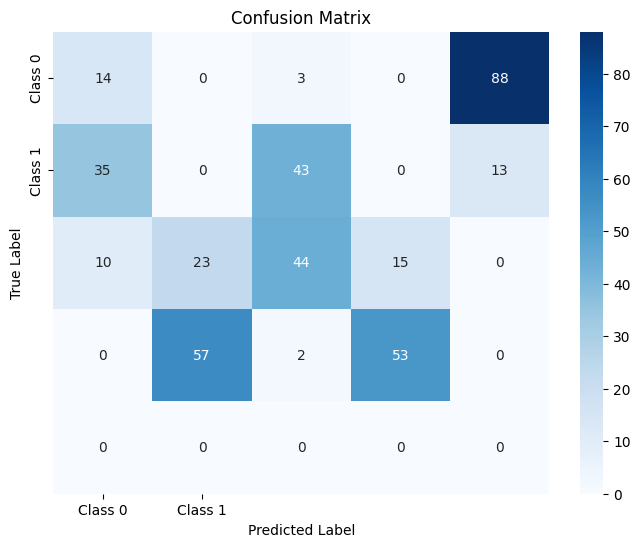

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 7- Data visualization 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


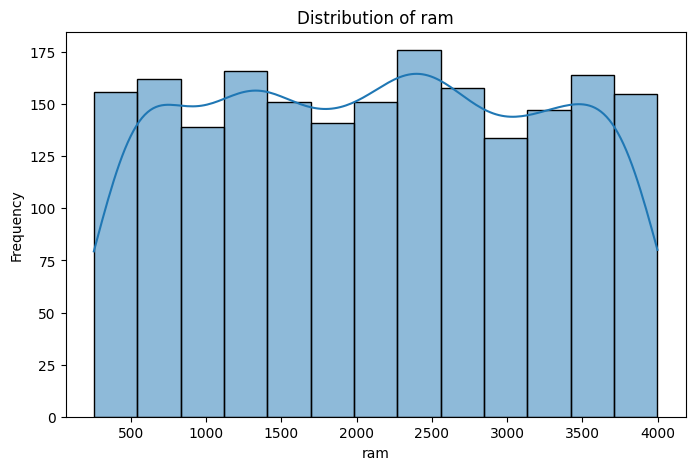

In [19]:
df = pd.DataFrame(data)

# 1. Histogram - Distribution of Battery Power
plt.figure(figsize=(8, 5))
sns.histplot(df['ram'], kde=True)
plt.title('Distribution of ram')
plt.xlabel('ram')
plt.ylabel('Frequency')
plt.show()

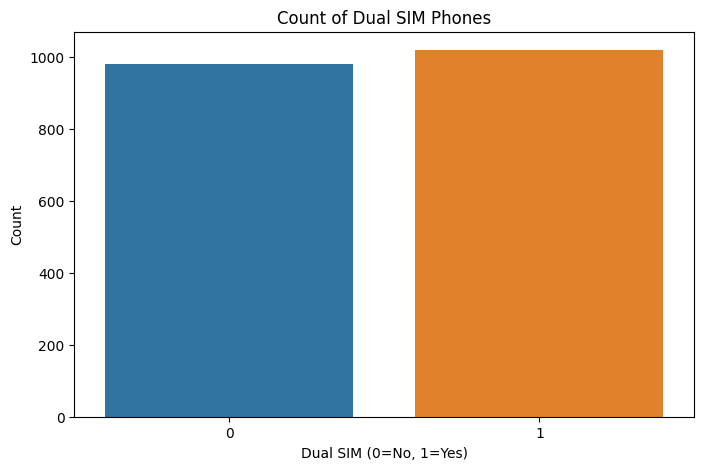

In [20]:
# 2. Count Plot - Count of Dual SIM Phones
plt.figure(figsize=(8, 5))
sns.countplot(x='dual_sim', data=df)
plt.title('Count of Dual SIM Phones')
plt.xlabel('Dual SIM (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

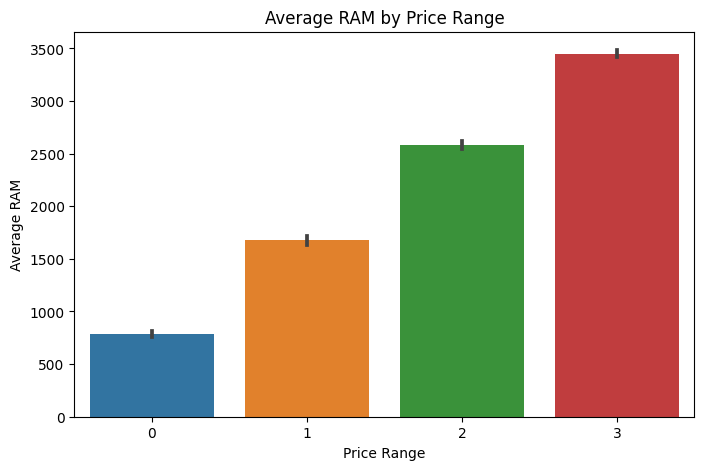

In [21]:
# 3. Bar Plot - Average RAM by Price Range
plt.figure(figsize=(8, 5))
sns.barplot(x='price_range', y='ram', data=df)
plt.title('Average RAM by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average RAM')
plt.show()

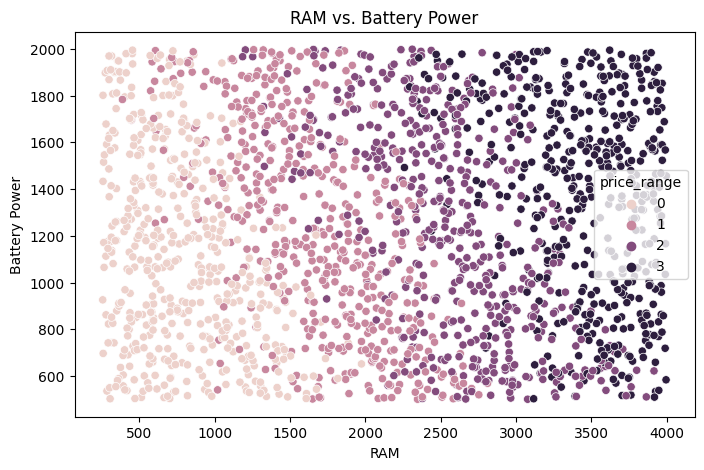

In [22]:
# 4. Scatter Plot - RAM vs. Battery Power
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ram', y='battery_power', hue='price_range', data=df)
plt.title('RAM vs. Battery Power')
plt.xlabel('RAM')
plt.ylabel('Battery Power')
plt.show()

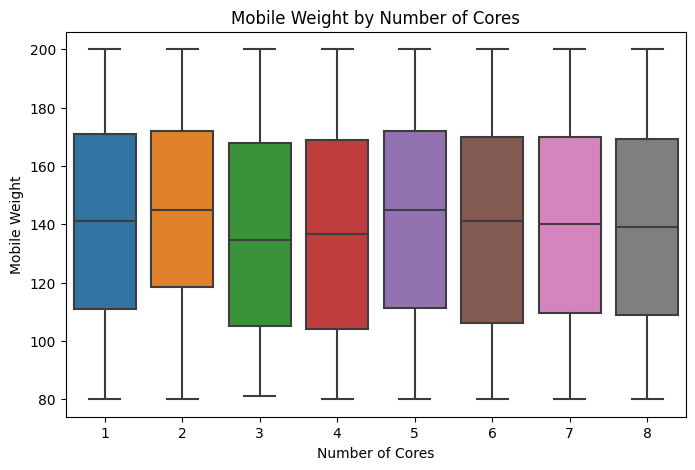

In [23]:
# 5. Box Plot - Mobile Weight by Number of Cores
plt.figure(figsize=(8, 5))
sns.boxplot(x='n_cores', y='mobile_wt', data=df)
plt.title('Mobile Weight by Number of Cores')
plt.xlabel('Number of Cores')
plt.ylabel('Mobile Weight')
plt.show()

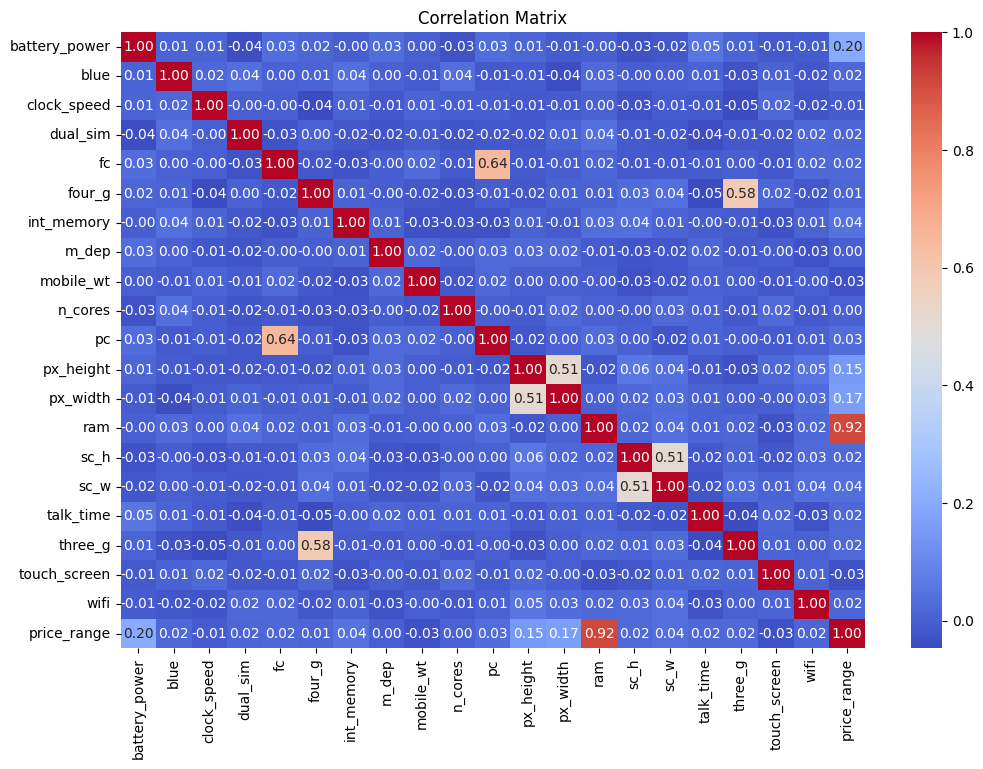

In [24]:
# 6. Heatmap - Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


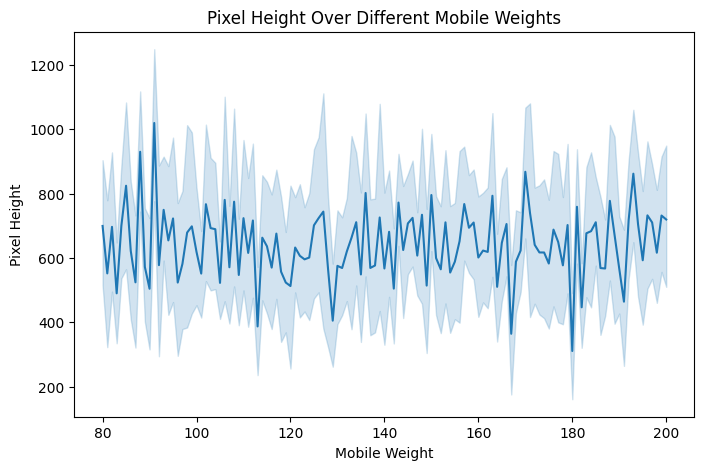

In [25]:
# 7. Line Plot - Pixel Height Over Different Mobile Weights
plt.figure(figsize=(8, 5))
sns.lineplot(x='mobile_wt', y='px_height', data=df)
plt.title('Pixel Height Over Different Mobile Weights')
plt.xlabel('Mobile Weight')
plt.ylabel('Pixel Height')
plt.show()

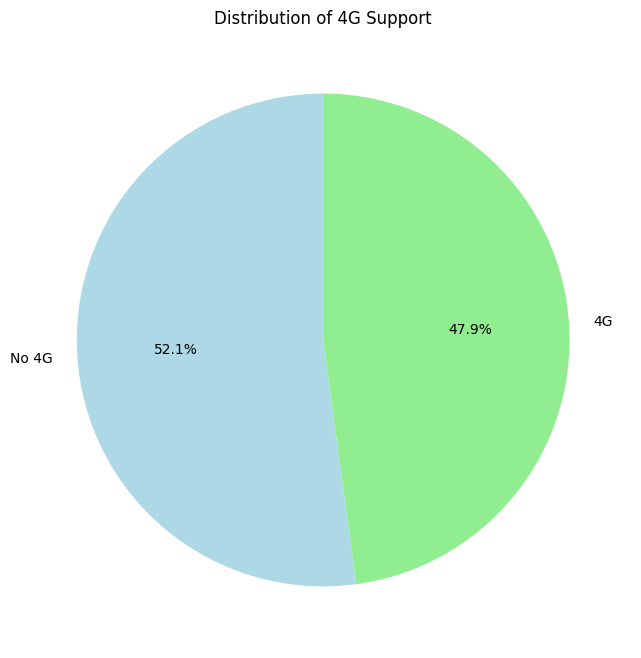

In [26]:
# 8. Pie Chart - Distribution of 4G Support
labels = ['No 4G', '4G']
sizes = df['four_g'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of 4G Support')
plt.show()

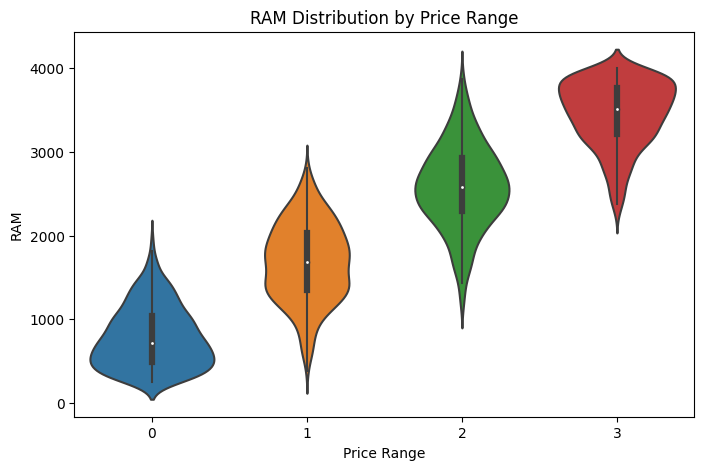

In [27]:
# 9. Violin Plot - RAM Distribution by Price Range
plt.figure(figsize=(8, 5))
sns.violinplot(x='price_range', y='ram', data=df)
plt.title('RAM Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.show()